# Predicción de series de tiempo

In [1]:
library(tseries)
library(TSA)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'TSA' was built under R version 4.0.4"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [2]:
data('gold')

In [4]:
help(gold)
start(gold)
end(gold)

[1] 1 1

[1] 252   1

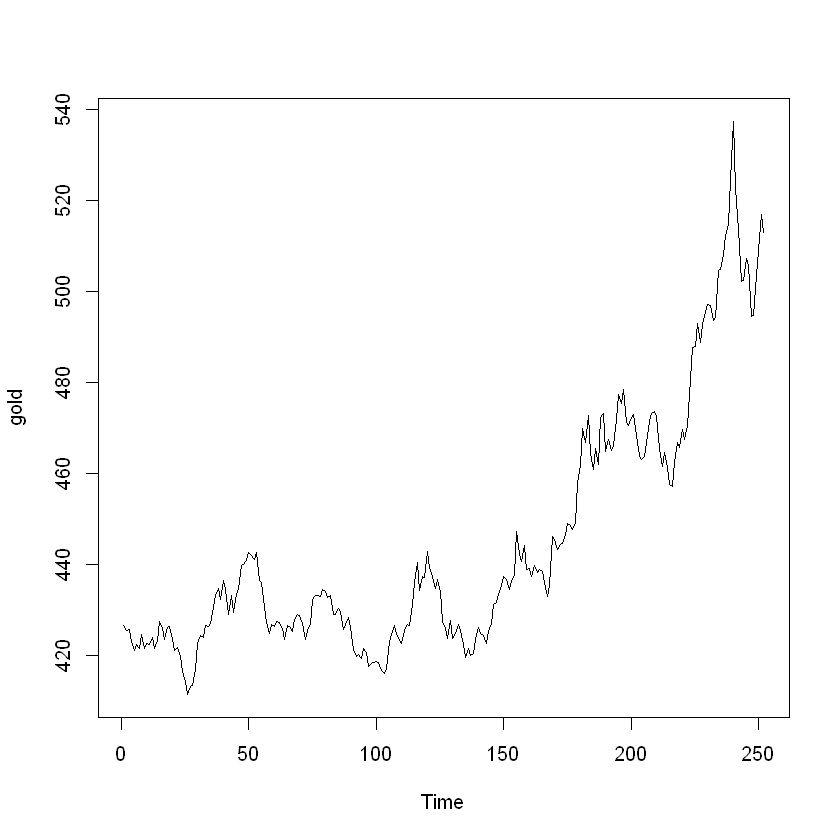

In [5]:
plot(gold)

In [6]:
summary(lm(gold~time(gold)))


Call:
lm(formula = gold ~ time(gold))

Residuals:
    Min      1Q  Median      3Q     Max 
-28.195 -13.695   0.306  12.612  57.848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 406.3537     1.9705  206.22   <2e-16 ***
time(gold)    0.3054     0.0135   22.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.59 on 250 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6704 
F-statistic: 511.5 on 1 and 250 DF,  p-value: < 2.2e-16


In [7]:
adf.test(gold)


	Augmented Dickey-Fuller Test

data:  gold
Dickey-Fuller = -1.7846, Lag order = 6, p-value = 0.6665
alternative hypothesis: stationary


In [10]:
Corr1 <- diff(log(gold))

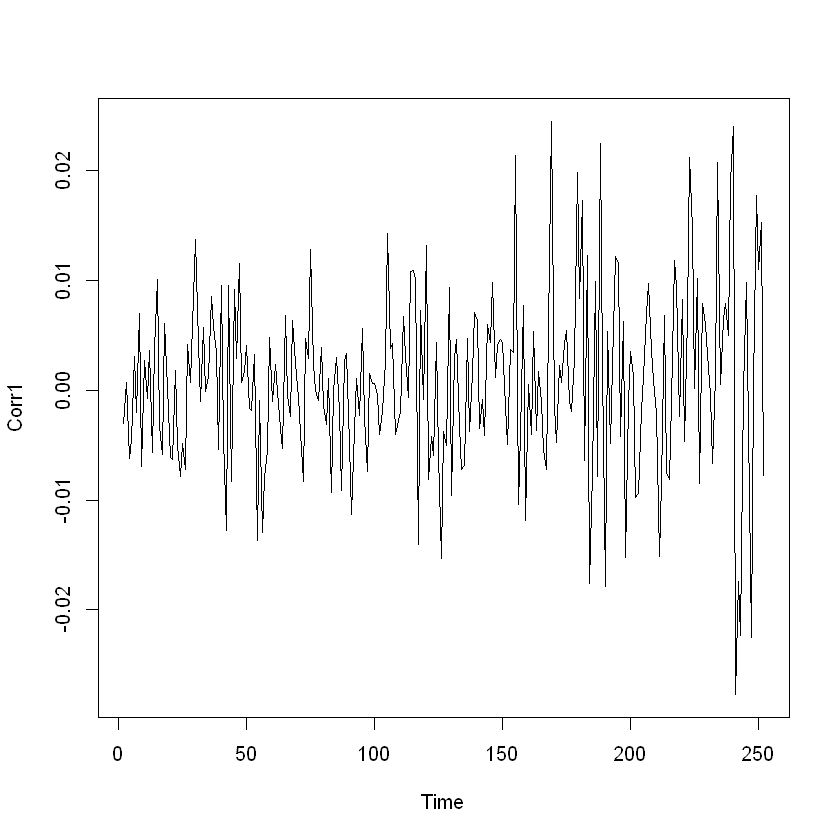

In [13]:
plot(Corr1)

In [12]:
summary(lm(Corr1~time(Corr1)))


Call:
lm(formula = Corr1 ~ time(Corr1))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0295968 -0.0049480 -0.0002032  0.0044923  0.0233458 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -5.305e-04  1.036e-03  -0.512    0.609
time(Corr1)  9.948e-06  7.089e-06   1.403    0.162

Residual standard error: 0.008137 on 249 degrees of freedom
Multiple R-squared:  0.007848,	Adjusted R-squared:  0.003863 
F-statistic:  1.97 on 1 and 249 DF,  p-value: 0.1617


In [14]:
adf.test(Corr1)

Warning message in adf.test(Corr1):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Corr1
Dickey-Fuller = -6.1997, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


### Modelo AR

In [15]:
ar(Corr1)


Call:
ar(x = Corr1)


Order selected 0  sigma^2 estimated as  6.648e-05

### Modelo MA

In [16]:
aux <- Inf
for(i in 1:20){
    if(AIC(arima(Corr1, order=c(0,0,i), method = 'ML')) < aux){
        aux <- AIC(arima(Corr1, order=c(0,0,i), method = 'ML'))
        MA.mejor <- i
    }
}
MA.mejor
aux

[1] 1

[1] -1698.977

### Modelo ARMA

In [17]:
defaultW <- getOption("warn") 

options(warn = -1) 

In [18]:
arma.aic <- Inf
for(j in 1:10){
    for(i in 1:10){
        if(AIC(arima(Corr1, order=c(j,0,i), method = 'ML')) < arma.aic){
            arma.aic <- AIC(arima(Corr1, order=c(j,0,i), method = 'ML'))
            ARMA.mejor <- c(j,i)
        }
    }
}
ARMA.mejor
arma.aic

[1] 3 2

[1] -1703.638

In [19]:
options(warn = defaultW)

## Ruido blanco

[1] -1.921604e-06

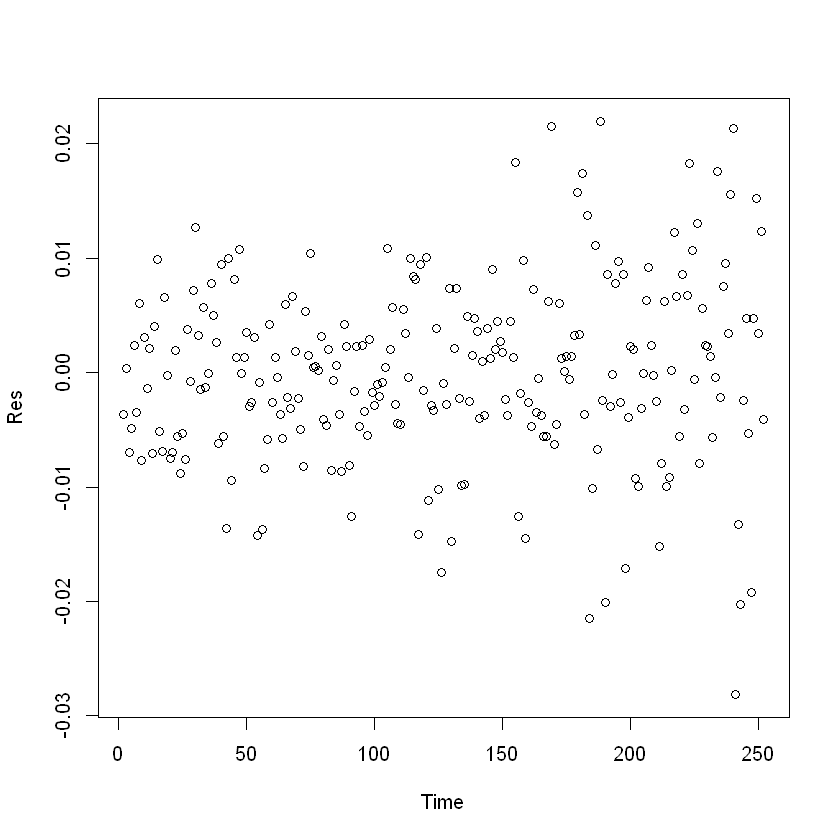

In [20]:
Res <- residuals(arima(Corr1, order = c(3,0,2), method = 'ML'))
mean(Res)
plot(Res,
    type = 'p')

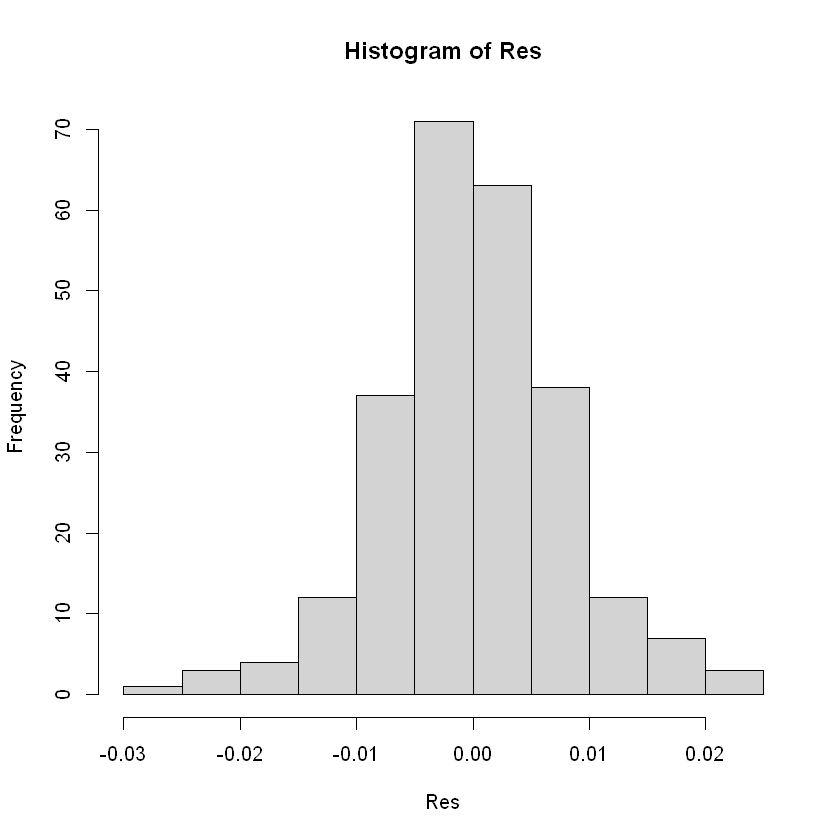

In [29]:
hist(Res)

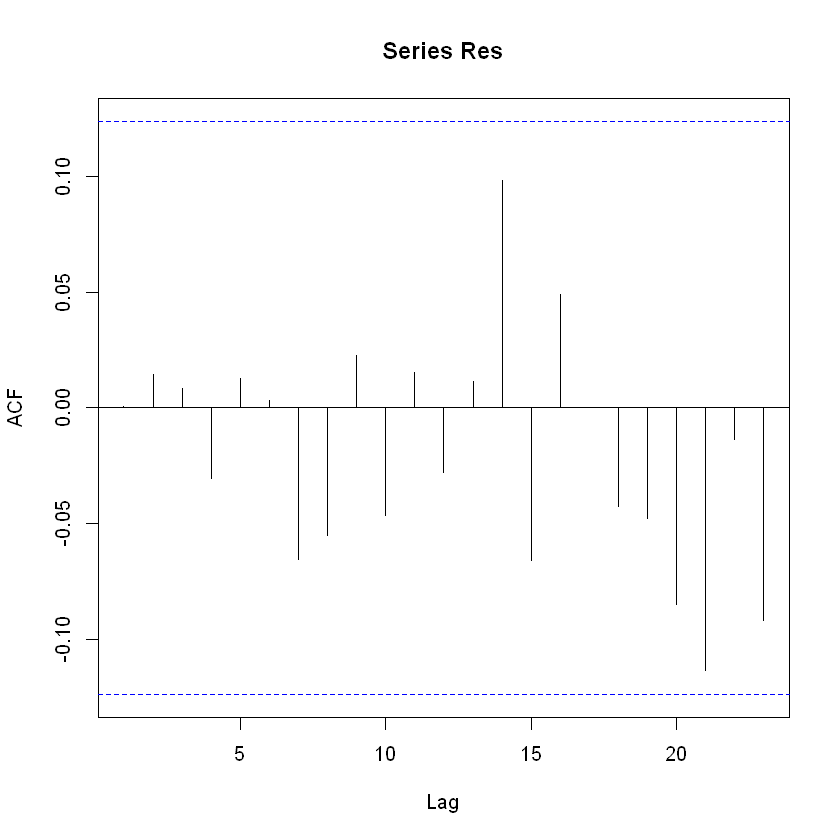

In [21]:
acf(Res)

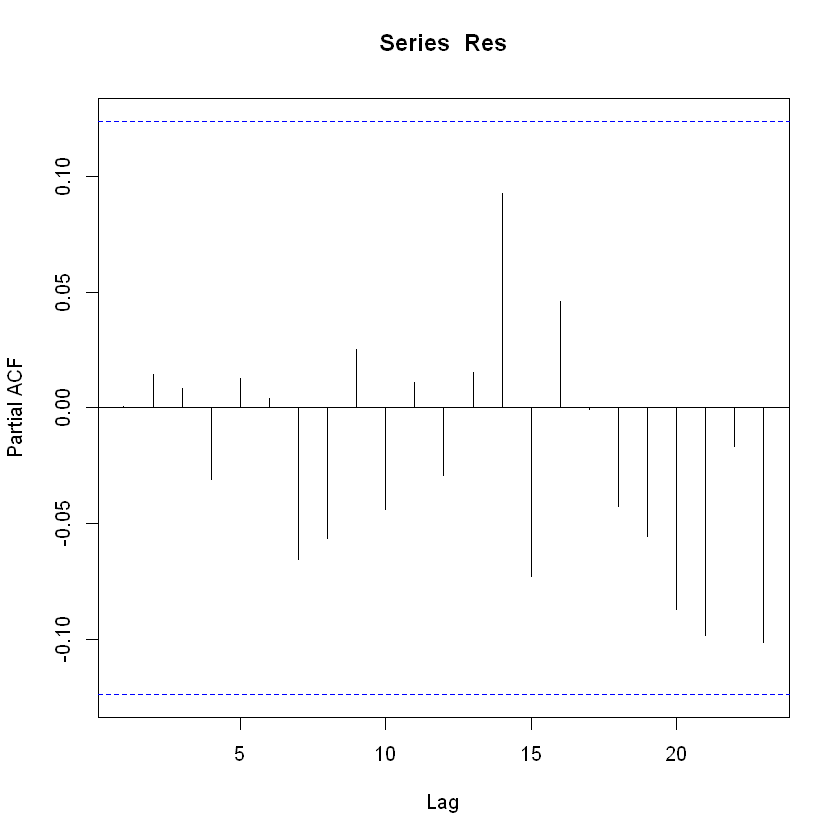

In [22]:
pacf(Res)

## Prediccion

In [23]:
Predict <- predict(arima(gold, order = c(3,1,2), method = 'ML'), n.ahead = 50)$pred

In [34]:
data.frame(time(Predict),Predict)

time.Predict.,Predict
<ts>,<ts>
253,509.5517
254,510.0092
255,513.6091
256,515.4220
257,513.0954
258,509.8965
259,510.1315
260,513.3542
261,515.1449


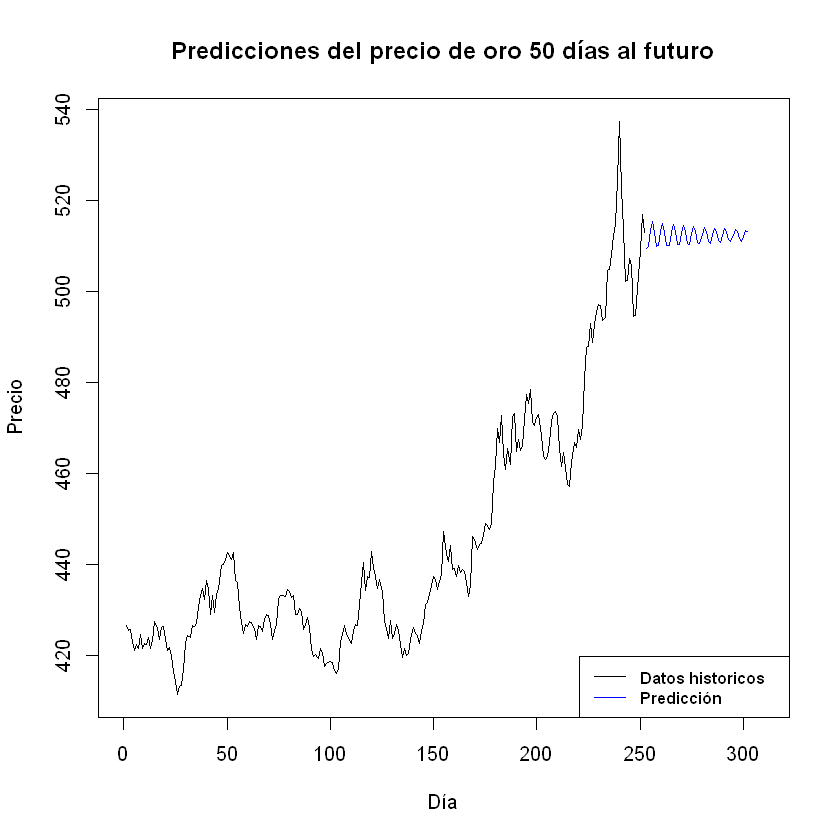

In [35]:
plot(gold,
    main = 'Predicciones del precio de oro 50 días al futuro',
    xlim = c(0, 310),
    xlab = 'Día',
    ylab = 'Precio')
lines(Predict,
     col = 'blue')
legend(legend = c('Datos historicos', 'Predicción'),
       lty=1,
       col = c('black', 'blue'),
       x = 'bottomright',
       cex = 0.8,
       text.font = 2)

In [25]:
AIC(arima(Corr1, order = c(3,0,2), method = 'ML'))

[1] -1703.638

In [27]:
AIC(arima(gold, order = c(3,1,2), method = 'ML'))

[1] 1377.709